# Продвинутое машинное обучение. Домашнее задание 3

> Третье домашнее задание посвящено достаточно простой, но, надеюсь, интересной задаче, в которой потребуется творчески применить методы сэмплирования.
\
В этом небольшом домашнем задании мы попробуем улучшить метод Шерлока Холмса. Как известно, в рассказе The Adventure of the Dancing Men великий сыщик расшифровал загадочные письмена, которые выглядели примерно так:
\
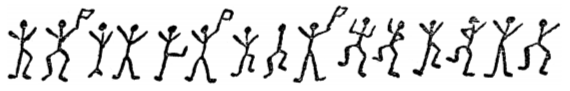
\
Пользовался он для этого так называемым частотным методом: смотрел, какие буквы чаще встречаются в зашифрованных текстах, и пытался подставить буквы в соответствии с частотной таблицей: E — самая частая и так далее.
\
В этом задании мы будем разрабатывать более современный и продвинутый вариант такого частотного метода. В качестве корпусов текстов для подсчётов частот можете взять что угодно, но для удобства вот вам “Война и мир” по-русски и по-английски:
\
https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip 


In [1]:
!wget -q https://www.dropbox.com/s/k23enjvr3fb40o5/corpora.zip
!unzip corpora.zip

Archive:  corpora.zip
  inflating: AnnaKarenina.txt        
  inflating: WarAndPeace.txt         
  inflating: WarAndPeaceEng.txt      


In [2]:
import re
from collections import Counter
from copy import copy

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

np.random.seed(42)

> 1. Реализуйте базовый частотный метод по Шерлоку Холмсу:
- подсчитайте частоты букв по корпусам (пунктуацию и капитализацию можно просто опустить, а вот пробелы лучше оставить);
- возьмите какие-нибудь тестовые тексты (нужно взять по меньшей мере 2-3 предложения, иначе вряд ли сработает), зашифруйте их посредством случайной перестановки символов;
- расшифруйте их таким частотным методом.


In [3]:
ALPHABET = 'йцукенгшщзхъфывапролджячсмитьбю '

corpus = []

for filename in ('WarAndPeace.txt', 'AnnaKarenina.txt'):
    with open(filename, 'r') as fin:
        corpus += fin.readlines()

corpus = ' '.join(corpus)
corpus = re.sub(r'\W+', ' ', corpus).lower()
corpus = ''.join([x for x in corpus if x in ALPHABET])
corpus[:100]

' война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател'

Частоты букв по корпусу

In [4]:
for symb, cnt in sorted(Counter(corpus).items(), key=lambda x: x[1], reverse=True):
    print(f'{symb}: {cnt / len(corpus) * 100:.2f}%')

 : 16.97%
о: 9.56%
е: 7.10%
а: 6.93%
н: 5.69%
и: 5.54%
т: 4.92%
с: 4.41%
л: 4.19%
в: 3.90%
р: 3.45%
к: 2.90%
д: 2.48%
м: 2.41%
у: 2.29%
п: 2.05%
я: 1.83%
ь: 1.64%
г: 1.58%
ы: 1.56%
б: 1.45%
з: 1.40%
ч: 1.33%
ж: 0.92%
й: 0.90%
ш: 0.73%
х: 0.67%
ю: 0.53%
ц: 0.26%
щ: 0.24%
ф: 0.13%
ъ: 0.03%


In [5]:
def encode(text):
    symbols = list(set(text))
    mapping = dict(zip(symbols, np.random.choice(symbols, replace=False, size=len(symbols))))
    return ''.join([mapping[c] for c in text])

def decode(text, corpus):
    corpus_cnt = sorted(Counter(corpus).items(), key=lambda x: x[1], reverse=True)
    text_cnt = sorted(Counter(text).items(), key=lambda x: x[1], reverse=True)

    corpus_top = ''.join([x[0] for x in corpus_cnt])
    text_top = ''.join([x[0] for x in text_cnt])

    mapping = dict(zip(text_top, corpus_top))
    
    return ''.join([mapping[c] for c in text])

def accuracy(text1, text2):
    return sum((c1 == c2) for c1, c2 in zip(text1, text2)) / len(text1)

Посмотрим на точность декодирования для разного размера текста

In [6]:
def test_decode_fn(decode_fn, corpus=corpus, encode_fn=encode):
    for i in range(1, 5):
        size = 10 ** i

        text = corpus[:size]
        enc = encode(text)
        dec = decode_fn(text, corpus)
        acc = accuracy(text, dec)

        print(f'Размер текста: {size}')
        print(f'Оригинальный текст: {text[:100]}')
        print(f'Закодированный текст: {enc[:100]}')
        print(f'Декодированный текст: {dec[:100]}')
        print(f'Точность декодирования: {acc} \n')

In [7]:
test_decode_fn(decode)

Размер текста: 10
Оригинальный текст:  война и м
Закодированный текст: оинвм ойоа
Декодированный текст:  оеани т с
Точность декодирования: 0.4 

Размер текста: 100
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: уынкепуоуиоаудпичкуогы дречкуанипеустыпуеознсп ыолпурнсдрнйнузпзуеозпзн увамйн уьаногы в ео уьодпр с
Декодированный текст:  тодие а мал вемуд аптнвриуд ломеи кыте иасокентабе рокврояо сес иасесон ьлзяон глоаптньниан гавернк
Точность декодирования: 0.26 

Размер текста: 1000
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: дящечкдад ахдук ыеданяруьчыедхщ кчдтлякдчажщткряапкдьщтуьщфщджкждчажкжщрдсхофщрдвхщанярсрчардваукьрт
Декодированный текст:  течлн а рав снрпч аьтосилпч вернл кгтн ладекнотаын иексиебе днд ладндео жвмбео увеаьтожолао уасниок
Точность декодирования: 0.294 

Размер текста: 1000

Видно, что с увеличением размера текста декодирование происходит более точно, но далеко не идеально

> 2. Вряд ли в результате получилась такая уж хорошая расшифровка, разве что если вы брали в качестве тестовых данных целые рассказы. Но и Шерлок Холмс был не так уж прост: после буквы E, которая действительно выделяется частотой, дальше он анализировал уже конкретные слова и пытался угадать, какими они могли бы быть. Я не знаю, как запрограммировать такой интуитивный анализ, так что давайте просто сделаем следующий логический шаг:
- подсчитайте частоты биграмм (т.е. пар последовательных букв) по корпусам;
- проведите тестирование аналогично п.1, но при помощи биграмм.


In [8]:
def get_ngrams(text, n=2):
    return [text[i:i+n] for i in range(len(text) - n + 1)]

Частоты биграмм

In [9]:
for symb, cnt in sorted(Counter(get_ngrams(corpus)).items(), key=lambda x: x[1], reverse=True):
    print(f'{symb}: {cnt / len(corpus) * 100:.2f}%')

о : 2.32%
а : 1.81%
и : 1.80%
е : 1.79%
 н: 1.59%
 с: 1.59%
 в: 1.48%
 п: 1.44%
то: 1.39%
 о: 1.31%
я : 1.11%
 и: 1.09%
на: 1.07%
 т: 1.06%
ст: 1.04%
ь : 1.04%
 к: 0.96%
не: 0.95%
ал: 0.93%
но: 0.93%
го: 0.85%
по: 0.82%
ко: 0.79%
он: 0.77%
ка: 0.76%
ов: 0.74%
ни: 0.74%
л : 0.73%
й : 0.73%
ла: 0.72%
ра: 0.72%
 д: 0.72%
м : 0.71%
ен: 0.71%
во: 0.69%
 б: 0.68%
ро: 0.68%
у : 0.66%
от: 0.63%
пр: 0.61%
ос: 0.60%
 ч: 0.59%
ло: 0.59%
ть: 0.58%
ол: 0.58%
ел: 0.57%
ер: 0.56%
в : 0.56%
 м: 0.56%
ор: 0.56%
ли: 0.55%
ва: 0.55%
ре: 0.54%
за: 0.53%
н : 0.52%
та: 0.50%
ск: 0.49%
те: 0.48%
 е: 0.48%
ом: 0.48%
ле: 0.48%
к : 0.47%
ан: 0.47%
ри: 0.46%
ог: 0.46%
ил: 0.45%
т : 0.44%
де: 0.44%
ат: 0.42%
ы : 0.42%
од: 0.42%
ве: 0.42%
ак: 0.42%
ет: 0.42%
 з: 0.41%
ви: 0.41%
да: 0.41%
аз: 0.41%
чт: 0.41%
 у: 0.40%
 р: 0.40%
  : 0.40%
бы: 0.39%
же: 0.39%
 г: 0.39%
ем: 0.39%
се: 0.39%
ин: 0.38%
ес: 0.37%
ти: 0.37%
ит: 0.36%
до: 0.36%
ас: 0.35%
ег: 0.35%
ль: 0.35%
 л: 0.34%
ю : 0.34%
вс: 0.33%
об: 0.33%
че: 0.32%


In [10]:
def decode_ngram(text, corpus, n_gram=2):

    corpus_ngrams = get_ngrams(corpus, n=n_gram)
    corpus_freqs = Counter(corpus_ngrams).items()
    corpus_freqs = {u: v / len(corpus) for u, v in corpus_freqs}
    corpus_freqs = sorted(corpus_freqs.items(), key=lambda x: x[1], reverse=True)
    
    text_ngrams = get_ngrams(text, n=n_gram)
    text_freqs = Counter(text_ngrams).items()
    text_freqs = {u: v / len(text) for u, v in text_freqs}
    text_freqs = sorted(text_freqs.items(), key=lambda x: x[1], reverse=True)

    mapping = dict()

    for text_ngram, text_freq in text_freqs:
        filtered_freqs = copy(corpus_freqs)

        for j in range(n_gram):
            if text_ngram[j] in mapping:
                filtered_freqs = [(ngram, freq) for ngram, freq in filtered_freqs if ngram[j] == mapping[text_ngram[j]]]

        min_dist, best_ngram = 1, None
        for ngram, freq in filtered_freqs:
            dist = abs(freq - text_freq)
            if dist < min_dist:
                min_dist, best_ngram = dist, ngram

        for j in range(n_gram):
            if text_ngram[j] not in mapping:
                    mapping[text_ngram[j]] = best_ngram[j]

    return ''.join([mapping[c] for c in text])

In [11]:
test_decode_fn(decode_ngram)

Размер текста: 10
Оригинальный текст:  война и м
Закодированный текст: айво маиан
Декодированный текст: о на но о 
Точность декодирования: 0.0 

Размер текста: 100
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: йикдмуйей елйоу гдйеыировмгдйлк умйзниуймечкзуриетуйвкзовкскйчучймечучкрйальскрйплкеыирармерйпеоуврз
Декодированный текст:  а  оо   к а тока   наотооа  а коо неао о н нооа ко о нто а  нон о нон о кала о на  наокоо о н тооон
Точность декодирования: 0.14 

Размер текста: 1000
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: йфясбжйрйлрмйюжл сйруфзюдб сймялжбйтыфжйбрчятжзфрьжйдятюдяняйчжчйбрчжчязйомкнязйхмяруфзозбрзйхрюждзт
Декодированный текст: о нинтотонтооатнбиота та нбиооннтноек тонтонетт тнто неа ниноотоонтотонтойовинтононта тйтнттонтат те
Точность декодирования: 0.041 

Размер текста: 1000

Качество декодирования получилось даже хуже

> 3. Но и это ещё не всё: биграммы скорее всего тоже далеко не всегда работают. Основная часть задания — в том, как можно их улучшить:
- предложите метод обучения перестановки символов в этом задании, основанный на MCMC-сэмплировании, но по-прежнему работающий на основе статистики биграмм;
- реализуйте и протестируйте его, убедитесь, что результаты улучшились.


Биграммы и их частоты - это марковская цепь и соотвествующие ей вероятности перехода между состояниями.

Воспользуемся алгоритмом Метрополиса-Гастингса: для какого-то начального декодирования будем делать случайную перестановку двух символов, если правдоподобие выросло, то данная перестановка принимается. Если нет, то она принимается с вероятностью, равной отношению нового и старого правдоподобия. Данная процедура повторяется несколько итераций.

Также будем повторять всю эту процедуру несколько эпох и выбирать лучшую из них (ту, чье правдоподобие больше). Это необходимо из-за того, что алгоритм не гарантирует глобального максимума правдоподобия

In [12]:
def random_swap(decoded_chars):
    new_decoded_chars = copy(decoded_chars)
    idx1, idx2 = np.random.choice(range(0, len(decoded_chars)), size=2, replace=False)
    new_decoded_chars[idx1], new_decoded_chars[idx2] = new_decoded_chars[idx2], new_decoded_chars[idx1]    
    return new_decoded_chars

def get_log_proba(text, mapping, freqs, n_gram=2, alphabet=ALPHABET):
    vocab_size = len(alphabet) ** n_gram
    decoded_text = ''.join([mapping[c] for c in text])
    log_proba = 0
    for i in range(len(decoded_text) - n_gram):
        ngram = decoded_text[i:i+n_gram]
        ngram_proba = freqs.get(ngram, 1 / (len(text) + vocab_size)) # smoothing
        log_proba += np.log(ngram_proba)
    return log_proba

def get_ngram_freqs(text, n_gram=2):
    vocab_size = len(set(text)) ** n_gram
    text_cnt = Counter(get_ngrams(text, n=n_gram)).items()
    freqs = {k: (v + 1) / (len(text) + vocab_size) for k, v in text_cnt} # smoothing
    return freqs

def mcmc_decode(text, corpus, n_gram=2, num_epochs=5, num_iter=1000):
    best_log_proba, best_mapping = -np.inf, None
    
    corpus_alphabet, text_alphabet = list(set(corpus)), list(set(text))
    corpus_freqs = get_ngram_freqs(corpus, n_gram=n_gram)
        
    for _ in range(num_epochs):
        decoded_chars = copy(corpus_alphabet)
        mapping = dict(zip(text_alphabet, decoded_chars))
        log_proba = get_log_proba(text, mapping, corpus_freqs, n_gram=n_gram)
        
        for _ in range(num_iter):
            new_decoded_chars = random_swap(decoded_chars)
            new_mapping = dict(zip(text_alphabet, new_decoded_chars))
            new_log_proba = get_log_proba(text, new_mapping, corpus_freqs, n_gram=n_gram)
            
            if new_log_proba > log_proba or np.exp(new_log_proba - log_proba) > np.random.rand():
                log_proba, decoded_chars, mapping = new_log_proba, new_decoded_chars, new_mapping
        
        if log_proba > best_log_proba:
            best_log_proba, best_mapping = log_proba, mapping
   
    return ''.join([best_mapping[c] for c in text])

In [13]:
test_decode_fn(mcmc_decode)

Размер текста: 10
Оригинальный текст:  война и м
Закодированный текст: иамнвоийи 
Декодированный текст: на стоненх
Точность декодирования: 0.0 

Размер текста: 100
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: елнсгиеьедьтевидзсеьпловагзсетндигейрлиегьунйиолькиеанйван неуиуегьуиуноемты ноечтньпломогьоечьвиаой
Декодированный текст:  таксе о доз иедьк очтйилськ задес руте сонарейтоме ларилаъа нен соненай взфъай пзаочтйвйсой поиелйр
Точность декодирования: 0.16 

Размер текста: 1000
Оригинальный текст:  война и мир самый известный роман льва николаевича толстого как никакое другое произведение писател
Закодированный текст: псгщакпдпьдфпйкьжщпднсюйважщпфгькапяыскпадегякюсдлкпвгяйвгхгпекепадекегюпзфбхгюпуфгднсюзюадюпудйквюя
Декодированный текст:  ноюда и вир савйю изнестдйю ровад льна диколаенича толстобо как дикакое црубое произнецедие писател
Точность декодирования: 0.807 

Размер текста: 1000

Качество получилось намного лучше

> 4. Расшифруйте сообщение:
←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏
\
Или это (они одинаковые, второй вариант просто на случай проблем с юникодом):
დჳჵჂႨშႼႨშჂხჂჲდႨსႹႭჾႣჵისႼჰႨჂჵჂႨႲႹႧჲჂႨსႹႭჾႣჵისႼჰႨჲდႩჳჲႨჇႨႠჲႹქႹႨჳႹႹჱჶდსჂႽႨႩႹჲႹႭႼჰႨჵდქႩႹႨႲႭႹႧჂჲႣჲიႨჳႩႹႭდდႨშჳდქႹႨშႼႨშჳდႨჳხდჵႣჵჂႨႲႭႣშჂჵისႹႨჂႨႲႹჵჇႧჂჲდႨჾႣႩჳჂჾႣჵისႼჰႨჱႣჵჵႨეႣႨႲႹჳჵდხსდდႨႧდჲშდႭჲႹდႨეႣხႣსჂდႨႩჇႭჳႣႨႾႹჲႽႨႩႹსდႧსႹႨႽႨსჂႧდქႹႨსდႨႹჱდჶႣნ


In [14]:
message = '←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←' \
'↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹' \
'↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹' \
'↝←↹⇛↲←⇆⇴⇏'

decode_message = mcmc_decode(message, corpus, num_epochs=32, num_iter=10000)
pprint(decode_message)

('если вы вимите нордальный или пожти нордальный текст у чтого сообъения '
 'который легко прожитать скорее всего вы все смелали правильно и полужите '
 'даксидальный балл за послемнее жетвертое замание курса хотя конежно я нижего '
 'не обеъаф')


In [15]:
true_message = 'если вы видите нормальный или почти нормальный текст у этого ' \
'сообщения который легко прочитать скорее всего вы все сделали правильно и ' \
'получите максимальный балл за последнее четвертое задание курса хотя конечно '  \
'я ничего не обещаю'

print(f'Точность декодирования {accuracy(decode_message, true_message)}')

Точность декодирования 0.9217391304347826


> 5. _Бонус_: а что если от биграмм перейти к триграммам (тройкам букв) или даже больше? Улучшатся ли результаты? Когда улучшатся, а когда нет? Чтобы ответить на этот вопрос эмпирически, уже может понадобиться погенерировать много тестовых перестановок и последить за метриками, глазами может быть и не видно.


In [16]:
decode_message = mcmc_decode(message, corpus, n_gram=3, num_epochs=32, num_iter=10000)
print(f'Точность декодирования {accuracy(decode_message, true_message)}')

Точность декодирования 0.9652173913043478


In [19]:
pprint(decode_message)

('если вы видите нормальный или пожти нормальный текст у чтого сообщения '
 'который легко прожитать скорее всего вы все сделали правильно и полужите '
 'максимальный балл за последнее жетвертое задание курса хотя конежно я нижего '
 'не обещаф')


Для данного сообщения переход к 3-граммам дал прирост качества. Протестируем разный размер n-грамм для разных размеров текста

In [17]:
def test_mcmc_ngrams(size_array, num_tests=10, max_ngram=5, corpus=corpus):

    for size in size_array:
        print(f'size = {size}')
        for n_gram in range(2, max_ngram+1):
            acc = 0
            for step in range(num_tests):
                text = corpus[size*(step):size*(step+1)]
                enc = encode(text)
                dec = mcmc_decode(enc, corpus, n_gram=n_gram)
                acc += accuracy(text, dec)
            acc /= num_tests
            print(f'n_gram = {n_gram}, средняя точность декодирования {acc}')

In [18]:
test_mcmc_ngrams((10, 100, 1000))

size = 10
n_gram = 2, средняя точность декодирования 0.07
n_gram = 3, средняя точность декодирования 0.030000000000000006
n_gram = 4, средняя точность декодирования 0.12
n_gram = 5, средняя точность декодирования 0.12
size = 100
n_gram = 2, средняя точность декодирования 0.334
n_gram = 3, средняя точность декодирования 0.381
n_gram = 4, средняя точность декодирования 0.28
n_gram = 5, средняя точность декодирования 0.334
size = 1000
n_gram = 2, средняя точность декодирования 0.48599999999999993
n_gram = 3, средняя точность декодирования 0.7678
n_gram = 4, средняя точность декодирования 0.7588000000000001
n_gram = 5, средняя точность декодирования 0.7556


В среднем переход к n-граммам большего размера увеличивает качество декодирования. Стоит также сказать, что все методы декодирования неустойчивы к маленькому размеру текста, потому что в этом случае очень мало статистики по символам

> 6. _Бонус_: какие вы можете придумать применения для этой модели? Пляшущие человечки ведь не так часто встречаются в жизни (хотя встречаются! и это самое потрясающее во всей этой истории, но об этом я расскажу потом).


- В военных делах возможно использование для расшифровки сообщений врага (хотя там явно шифрование посильнее)
- Для восстановления сообщения переданного с потерями
- Возможно в генетике для расшифровки генов
- Скорее всего имеет место быть в системах распознавания речи (перевод из фрейма аудио-сигнала в символ) 